#### improt Libraries

In [2]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt 
%matplotlib inline
plt.rcParams["figure.figsize"] = (20, 6) 

### read csv file and meta data

In [19]:
df = pd.read_csv('COVID-19 Coronavirus.csv')
df.head()

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
0,Afghanistan,Afghanistan,AFG,40462186,Asia,177827,7671,4395,190,4.313743
1,Albania,Albania,ALB,2872296,Europe,273870,3492,95349,1216,1.275058
2,Algeria,Algeria,DZA,45236699,Africa,265691,6874,5873,152,2.587216
3,Andorra,Andorra,AND,77481,Europe,40024,153,516565,1975,0.382271
4,Angola,Angola,AGO,34654212,Africa,99194,1900,2862,55,1.915438


In [4]:
df.shape # (rows , cols)

(225, 10)

In [5]:
df.describe()

,Population,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
count,2.250000e+02,2.250000e+02,2.250000e+02,225.000000,225.000000,225.000000
mean,3.507321e+07,2.184781e+06,2.744813e+04,136900.373333,1096.715556,1.444125
std,1.392418e+08,7.275938e+06,9.689177e+04,145060.340289,1195.715543,1.741728
min,8.050000e+02,1.000000e+00,0.000000e+00,9.000000,0.000000,0.000000
25%,5.665570e+05,2.407100e+04,1.890000e+02,11384.000000,123.000000,0.511291
50%,5.827911e+06,1.639360e+05,1.965000e+03,88987.000000,708.000000,1.036905
75%,2.190585e+07,1.092547e+06,1.366000e+04,223335.000000,1795.000000,1.977017
max,1.439324e+09,8.183905e+07,1.008222e+06,696044.000000,6286.000000,18.151787


###### cleaning the data

In [3]:
df.info() # find which col has null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  225 non-null    object 
 1   Other names              224 non-null    object 
 2   ISO 3166-1 alpha-3 CODE  225 non-null    object 
 3   Population               225 non-null    int64  
 4   Continent                225 non-null    object 
 5   Total Cases              225 non-null    int64  
 6   Total Deaths             225 non-null    int64  
 7   Tot Cases//1M pop        225 non-null    int64  
 8   Tot Deaths/1M pop        225 non-null    int64  
 9   Death percentage         225 non-null    float64
dtypes: float64(1), int64(5), object(4)
memory usage: 17.7+ KB


In [1]:
# find rows have non values
df[df.isnull().any(axis=1)]

NameError: name 'df' is not defined

In [11]:
# make sure for non null value
df.isnull().sum()

Country              0
ISO3                 0
Population           0
Continent            0
Total Cases          0
Total Deaths         0
Tot Cases//1M pop    0
Tot Deaths/1M pop    0
Death percentage     0
dtype: int64

In [20]:
# rename and delete unused columns

df.rename(columns={'ISO 3166-1 alpha-3 CODE':'ISO3'} , inplace=True)
df.loc[df['Continent'] == 'Latin America and the Caribbean', 'Continent'] = 'Latin America'

# df.loc[df['Continent']=='Latin America and the Caribbean'] ='Latin America' : يحول كل الصف الى القيمه الجديده

df.drop('Other names' , axis = 1 , inplace = True)

In [6]:
# find duplicated value
df[df.duplicated()]

,Country,Other names,ISO 3166-1 alpha-3 CODE,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage


In [21]:
# fix values if have a inconsistency
columns_to_capitalize = ['Country' , 'Continent']
df[columns_to_capitalize] = df[columns_to_capitalize].apply(lambda x: x.str.capitalize())

print(df['Continent'].nunique())
df['Country'].nunique()

6


225

#### data analysis 


###### q1 : is population has corrlation with total cases and total death

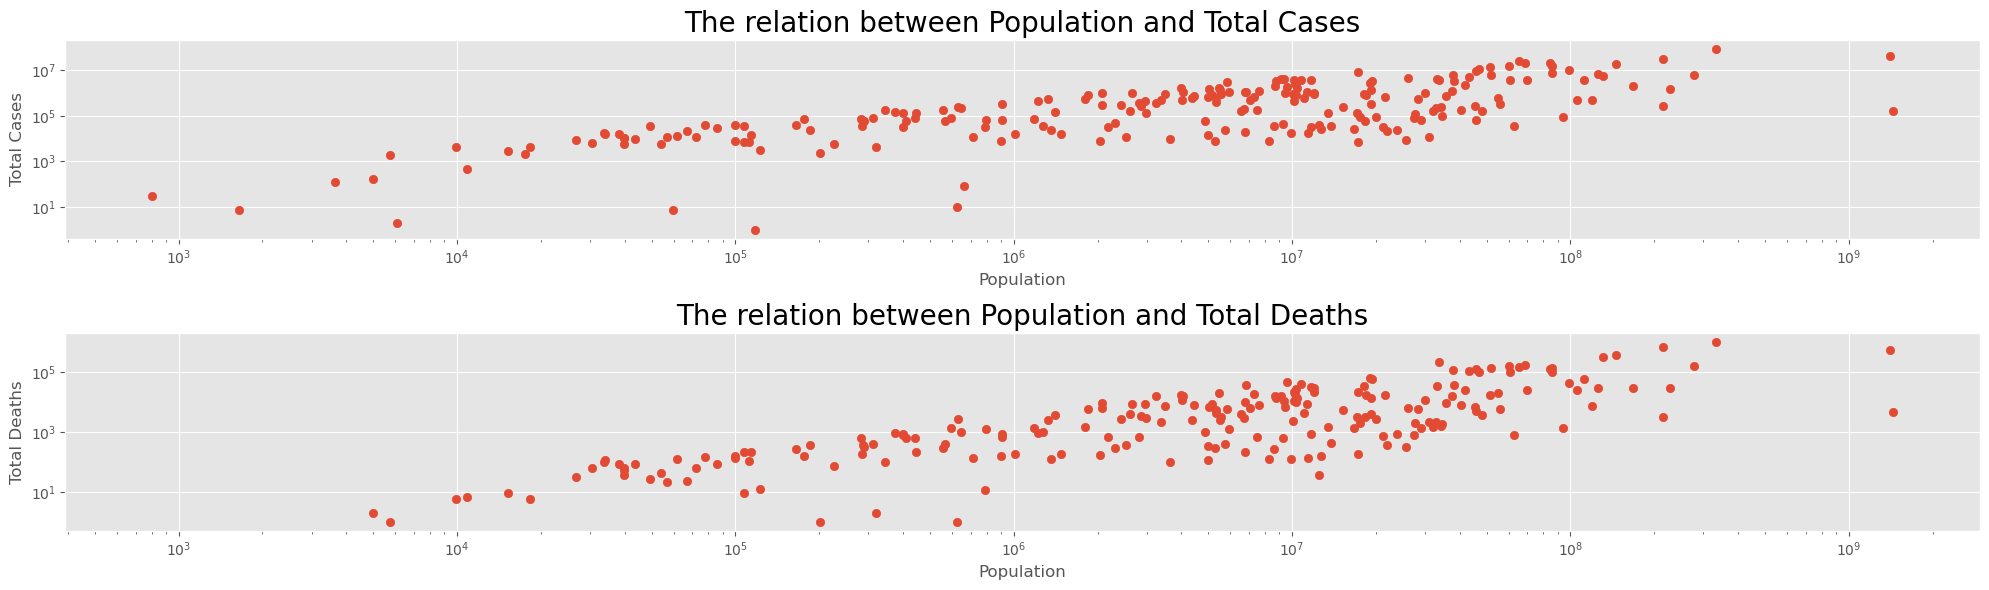

In [98]:
columns=['Total Cases' , 'Total Deaths']
n=1
for i in columns:
    plt.subplot(2,1 , n)
    ax = plt.gca()
    plt.scatter(y = X[i] , x = X['Population'])
    plt.xscale('log')
    plt.yscale('log')
    ax.set_xlabel('Population')
    ax.set_ylabel(i)
    ax.set_title(f'The relation between Population and {i}' , fontsize=20)
    n+=1 
    plt.tight_layout()   
# plt.savefig(r"D:\mohamed\chart45.png")

###### q2 : is total deaths has correlation with total cases

Text(0.5, 1.0, 'correlation between total deaths and total cases ')

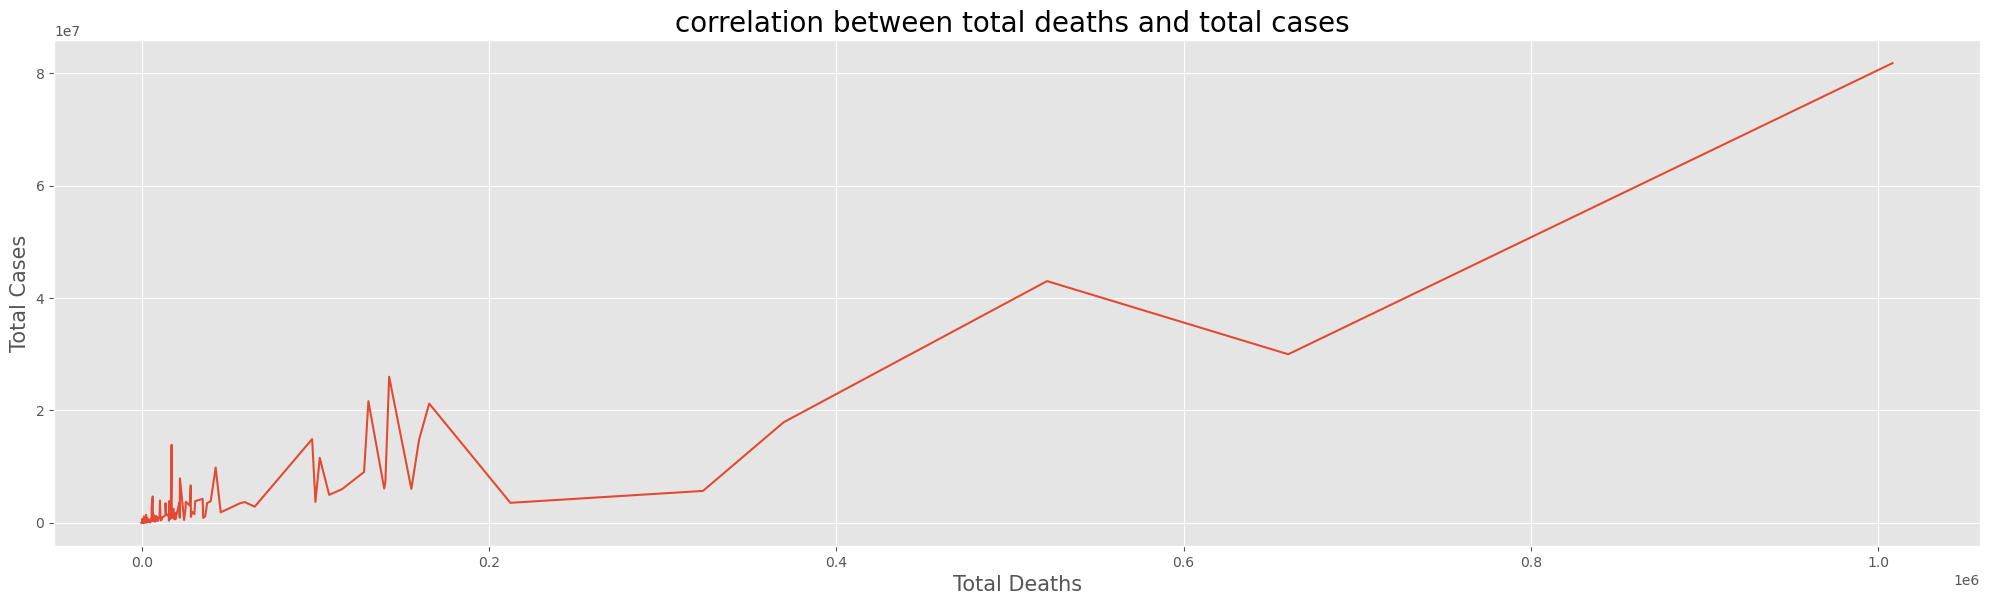

In [74]:
df_sorted = df

df_sorted = df.sort_values(by='Total Deaths')
x = df_sorted['Total Deaths']
y = df_sorted['Total Cases']

plt.style.use("ggplot")
plt.plot(x, y)
plt.xlabel('Total Deaths',fontsize = 15)
plt.ylabel('Total Cases',fontsize = 15)
plt.tight_layout()
# plt.xscale('log')

plt.title("correlation between total deaths and total cases ", fontsize =20)
# plt.savefig(r"D:\mohamed\chart2.png")

###### q3 : what is percentage of total cases in each Continent

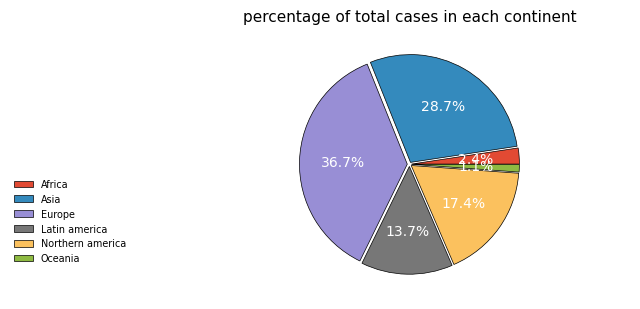

In [64]:
# plt.figure(figsize=(8, 5))
plt.rcParams["figure.figsize"] = (8, 3.5)
slicies = df.groupby('Continent')['Total Cases'].sum()
explode = [0.02 ,0.02 ,0.02 ,0.02 ,0.02 ,0.02]
labels = df.groupby('Continent')['Total Cases'].sum().index
plt.pie(slicies ,labels=labels , explode=explode , wedgeprops = {"edgecolor":'black'}
        , autopct='%2.1f%%' ,textprops=dict(color="w"))

plt.legend( bbox_to_anchor = (-1,0.1 ),loc='lower left' ,facecolor = 'None' , frameon=False , fontsize='x-small')
plt.title("percentage of total cases in each continent", fontsize =11)

plt.savefig(r"D:\mohamed\chart3.png")

###### q4 : what is percentage of total death in each Continent

Text(0.5, 1.0, 'percentage of total deaths in each continent')

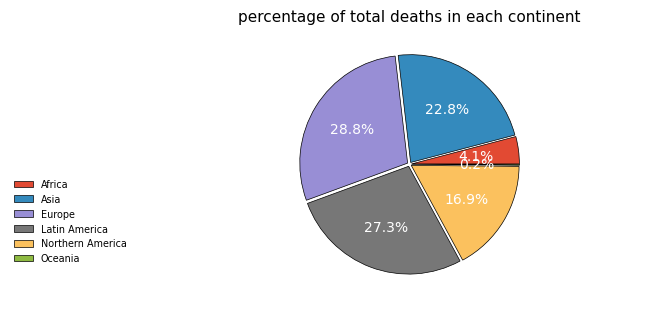

In [108]:
# plt.figure(figsize=(8, 5))
plt.rcParams["figure.figsize"] = (8, 3.5)
slicies = df.groupby('Continent')['Total Deaths'].sum()
explode = [0.02 ,0.02 ,0.02 ,0.02 ,0.02 ,0.02]
labels = df.groupby('Continent')['Total Deaths'].sum().index
plt.pie(slicies ,labels=labels , explode=explode , wedgeprops = {"edgecolor":'black'}
        , autopct='%2.1f%%' ,textprops=dict(color="w"))

plt.legend( bbox_to_anchor = (-1,0.1 ),loc='lower left' ,facecolor = 'None' , frameon=False , fontsize='x-small')
plt.title("percentage of total deaths in each continent", fontsize =11)

# plt.savefig(r"D:\mohamed\chart4.png")

###### the population of each continent

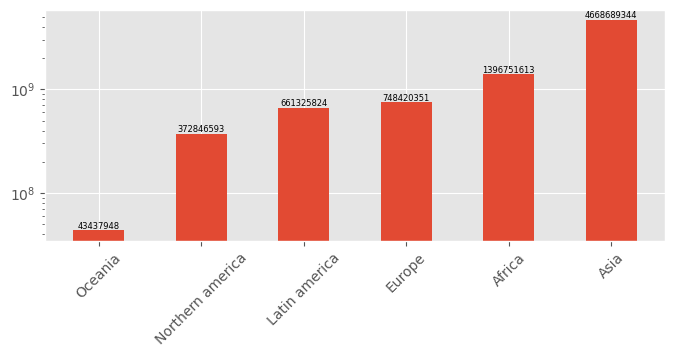

In [77]:
x = df.groupby('Continent')['Population'].sum().sort_values()
plt.bar(x.index,x.values , width = 0.5)
plt.yscale('log')
plt.xticks(rotation=45)

for i, v in enumerate(x.values):
    plt.text(i, v, str(v), ha='center', va='bottom' , fontsize=6)

###### total cases and deaths in each continent

Text(0.5, 1.0, 'total cases and total deaths')

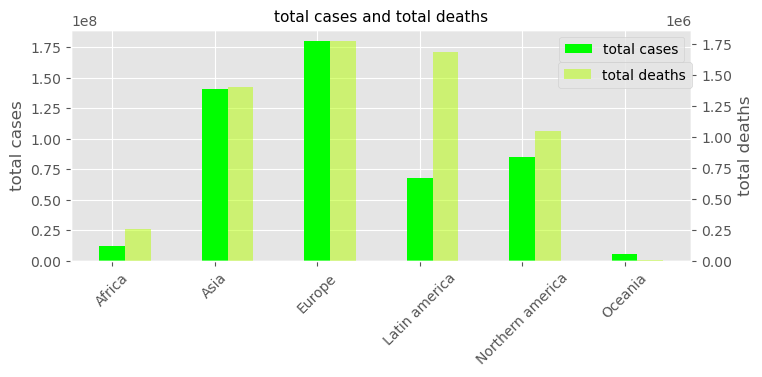

In [25]:
plt.style.use("ggplot")

fig , ax1 = plt.subplots()
y1= df.groupby('Continent')['Total Cases'].sum()

ax1.bar(y1.index , y1 , width=0.25 , label='total cases', color = '#00fe00' ,  alpha = 1)
plt.xticks(rotation=45)
ax1.legend()
ax1.set_ylabel("total cases")

ax2 = ax1.twinx()
y2 = df.groupby('Continent')['Total Deaths'].sum()
x2 = [x + 0.25 for x in range(len(y2.index))]
ax2.bar(x2 , y2 , width=0.25 , label='total deaths' , color = '#b4fe00' , alpha = 0.5)
ax2.legend(loc=(0.785,0.75))
ax2.set_ylabel("total deaths")

plt.grid(False)
plt.title("total cases and total deaths", fontsize =11)

# plt.savefig(r"D:\mohamed\chart5.png")

###### percentage of deaths of total cases

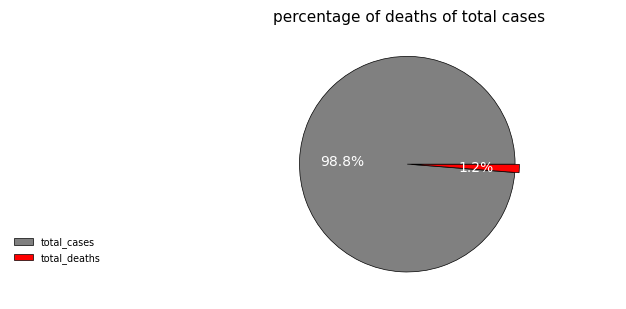

In [207]:
total_cases = df['Total Cases'].sum()
total_deaths = df['Total Deaths'].sum()

# plt.figure(figsize=(8, 5))
plt.rcParams["figure.figsize"] = (8, 3.5)
slicies = [total_cases,total_deaths]
explode = [0.02 ,0.02 ]
labels = ['total_cases' ,'total_deaths']
plt.pie(slicies ,labels=labels , explode=explode , wedgeprops = {"edgecolor":'black'}
        , autopct='%2.1f%%' ,textprops=dict(color="w") , colors=['gray' , 'red'])

plt.legend( bbox_to_anchor = (-1,0.1 ),loc='lower left' ,facecolor = 'None' ,
           frameon=False , fontsize='x-small')

plt.title("percentage of deaths of total cases", fontsize =11)
# plt.savefig(r"D:\mohamed\chart6.png")

###### top 10 countries with have highest cases and bottom 10 countries with have lowest cases

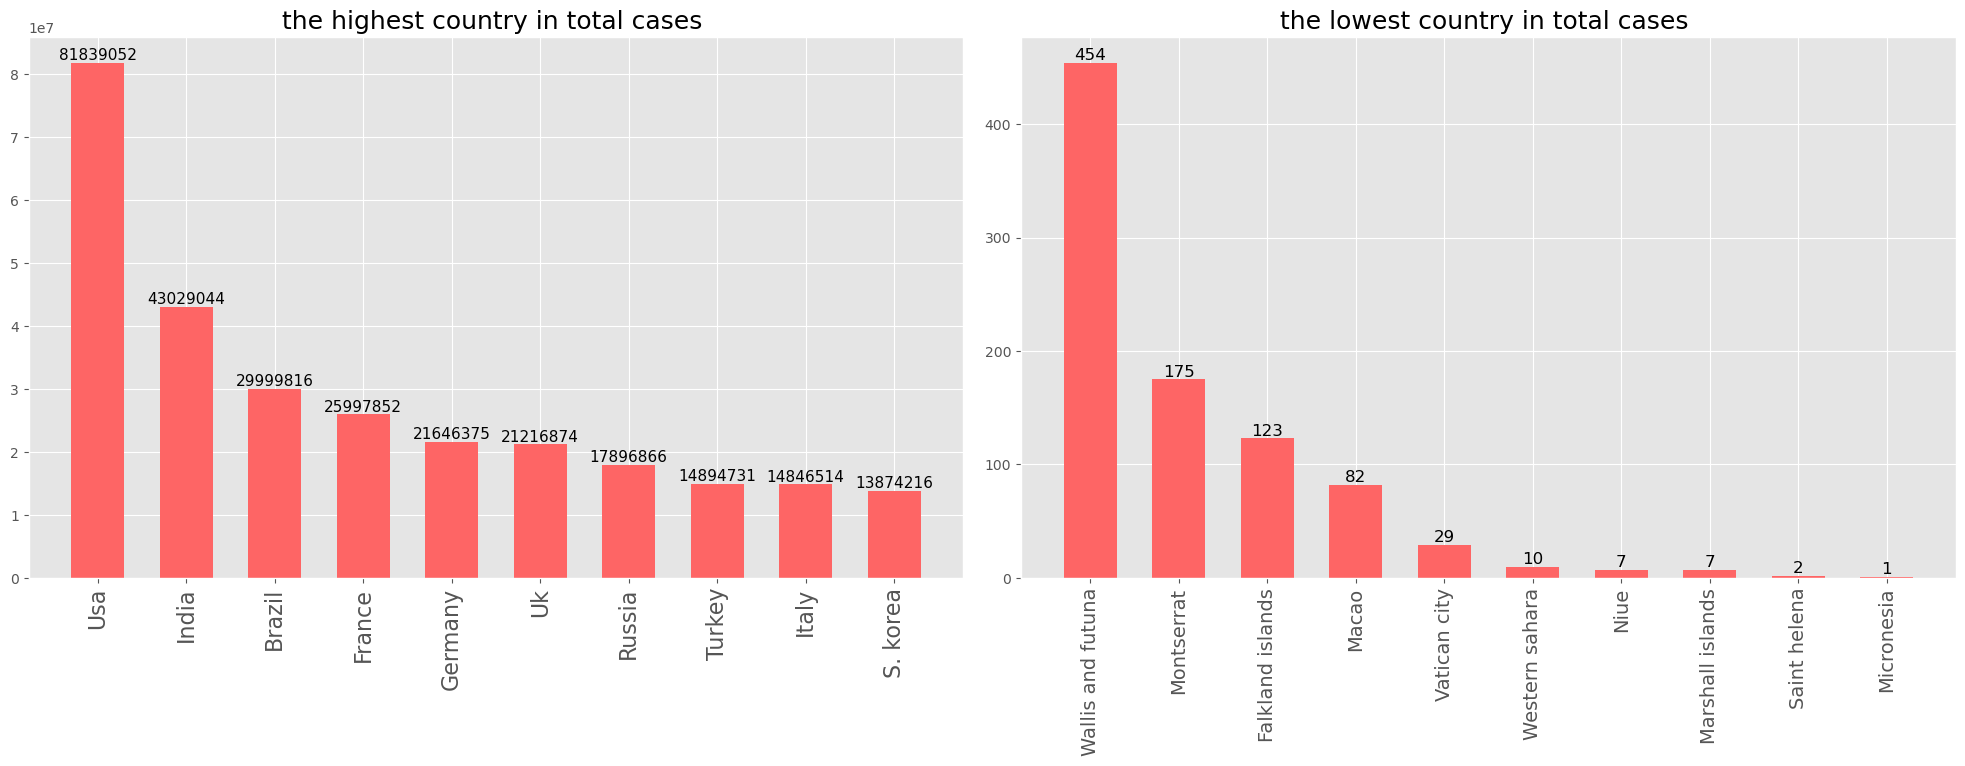

In [108]:
X = df.sort_values(by='Total Cases' , ascending=False)

plt.rcParams["figure.figsize"] = (20, 6)

fig , (ax1,ax2) = plt.subplots(ncols=2)
fig.tight_layout()

x1 = X['Country'].head(10)
x2 = X['Country'].tail(10)
y1 = X['Total Cases'].head(10)
y2 = X['Total Cases'].tail(10)

ax1.bar(x1,y1, color='#fe6565', width=0.6)
ax1.tick_params(axis='x', rotation=90 , labelsize=16)
ax1.set_title("the highest country in total cases ", fontsize =18)

ax2.bar(x2,y2, color='#fe6565' , width=0.6)
ax2.tick_params(axis='x', rotation=90 , labelsize=14)
ax2.set_title("the lowest country in total cases ", fontsize =18)

for i, v in enumerate(y1):
    ax1.text(i, v, str(v), ha='center', va='bottom' , fontsize=11)
    
for i, v in enumerate(y2):
    ax2.text(i, v, str(v), ha='center', va='bottom' , fontsize=12)
    
# plt.savefig(r"D:\mohamed\chart7.png")

###### top 10 countries with have highest deaths and bottom 15 countries with have lowest deaths

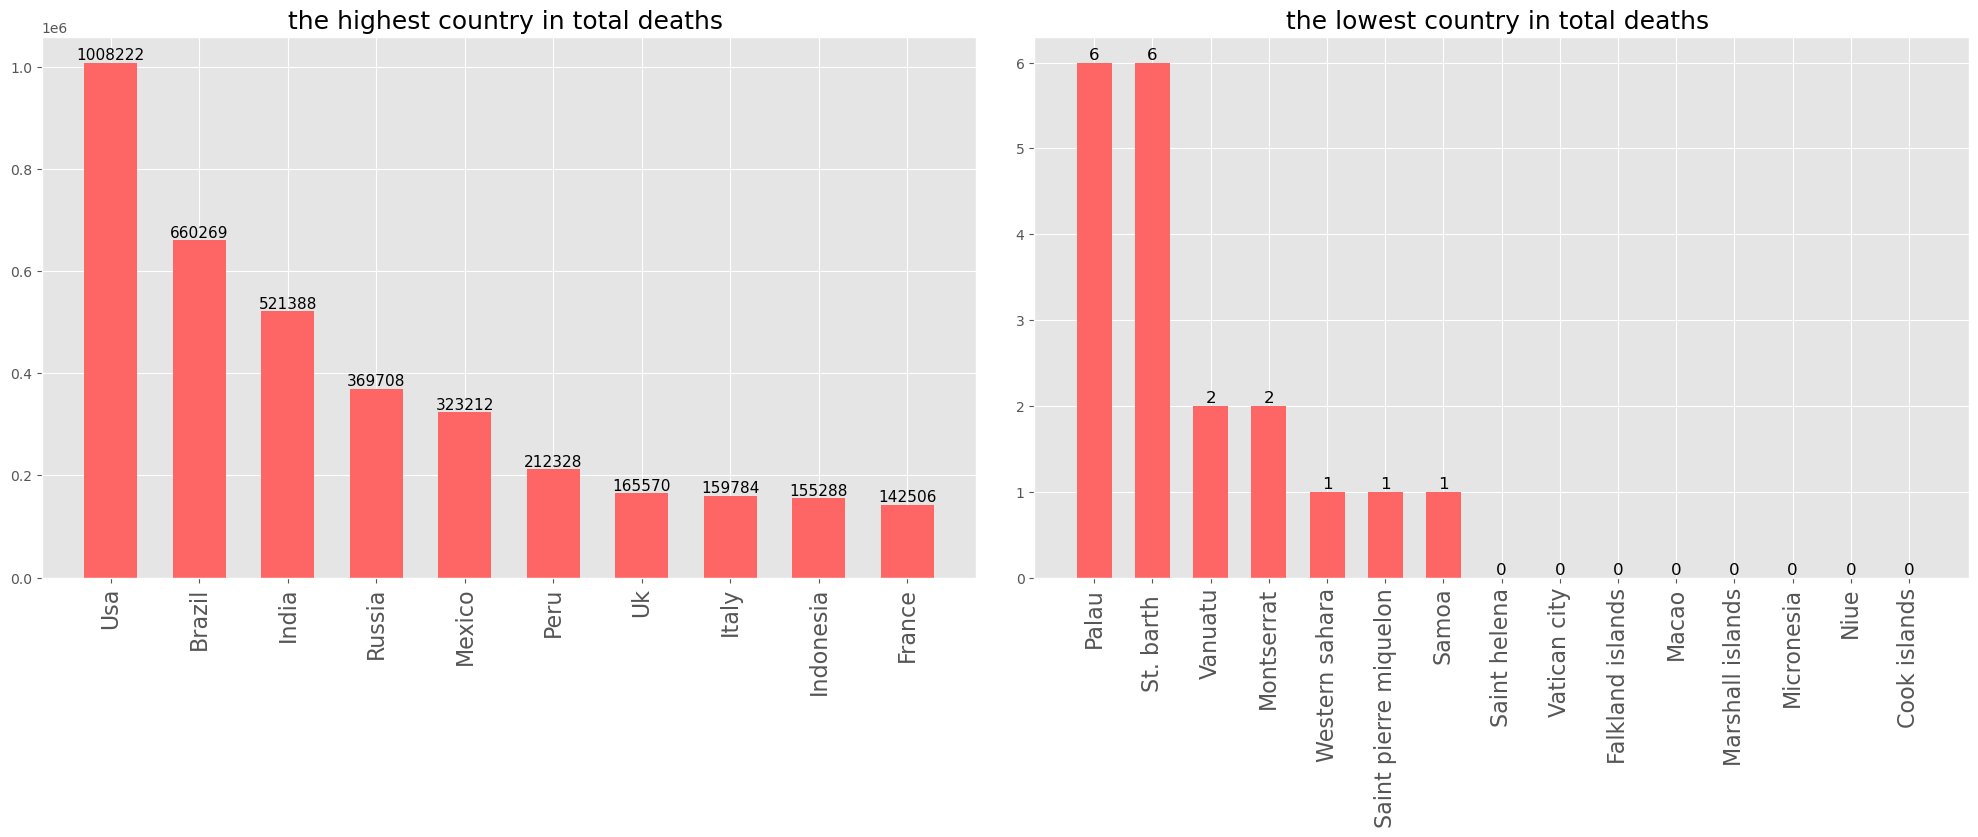

In [109]:
X = df.sort_values(by='Total Deaths' , ascending=False)

fig , (ax1,ax2) = plt.subplots(ncols=2)
fig.tight_layout()

x1 = X['Country'].head(10)
x2 = X['Country'].tail(15)
y1 = X['Total Deaths'].head(10)
y2 = X['Total Deaths'].tail(15)

ax1.bar(x1,y1, color='#fe6565', width=0.6)
ax1.tick_params(axis='x', rotation=90, labelsize=16)
ax1.set_title("the highest country in total deaths ", fontsize =18)

ax2.bar(x2,y2, color='#fe6565', width=0.6)
ax2.tick_params(axis='x', rotation=90 , labelsize=16)
ax2.set_title("the lowest country in total deaths ", fontsize =18)

for i, v in enumerate(y1):
    ax1.text(i, v, str(v), ha='center', va='bottom', fontsize=11)
    
for i, v in enumerate(y2):
    ax2.text(i, v, str(v), ha='center', va='bottom', fontsize=12)
    
    


# plt.savefig(r"D:\mohamed\chart8.png")

###### Distribution of Death percentage and Case percentage

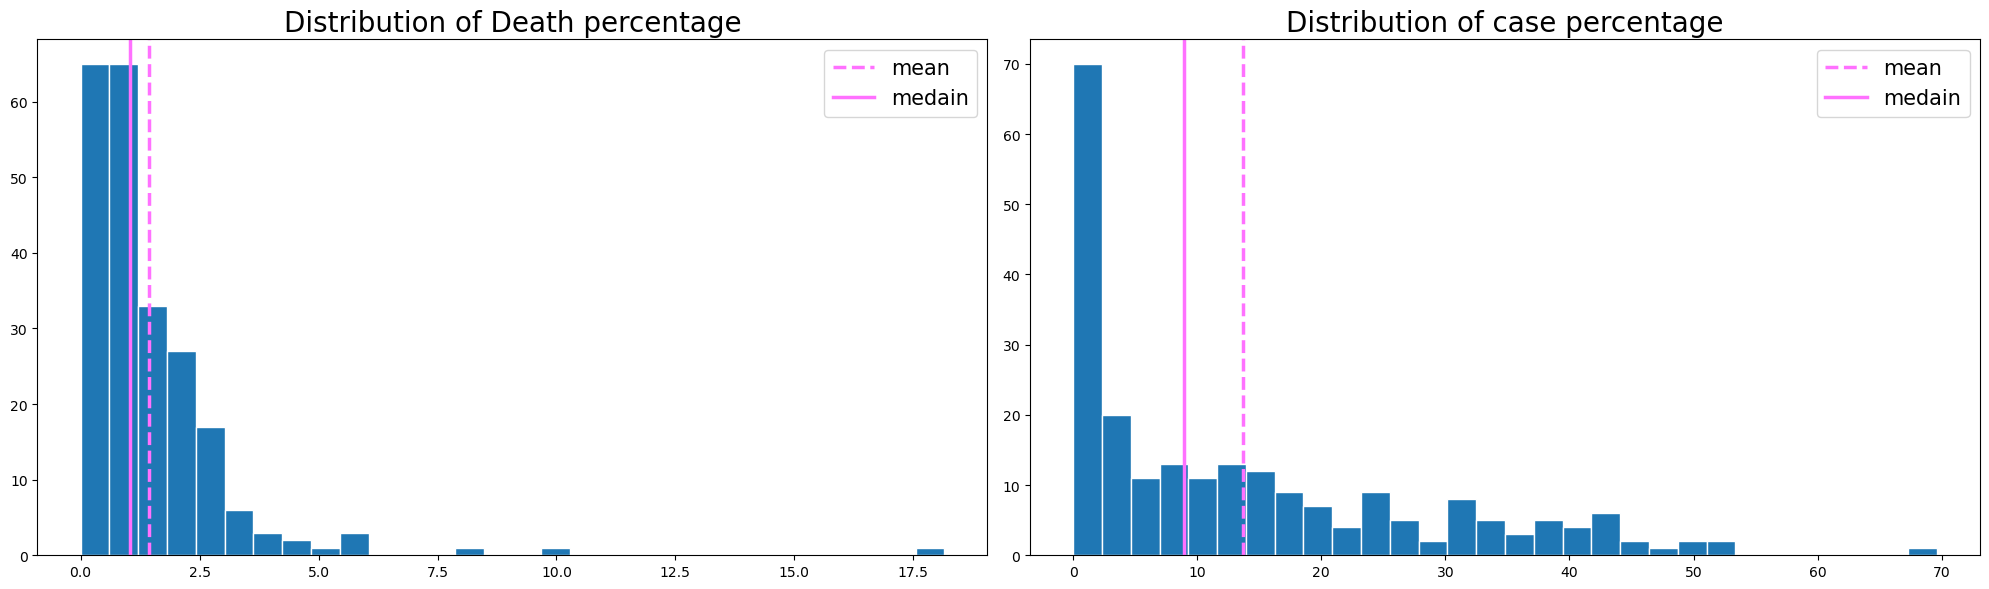

In [40]:
X=df
X['case percentage'] = X['Total Cases'] / X['Population']*100

columns= ['Death percentage' , 'case percentage']
n=1
for i in columns:
    plt.subplot(1,2 , n)
    ax = plt.gca()
    plt.hist(df[i], edgecolor = 'white' , bins=30)
    plt.axvline(x=df[i].mean(),ls='--',lw=2.5, color='#ff71ff',label='mean')
    plt.axvline(x=df[i].median(), color='#ff71ff',label='medain',lw=2.5)
    plt.legend(fontsize=15)
    ax.set_title(f'Distribution of {i}' , fontsize=20)
    n+=1 
    plt.tight_layout()
    
# plt.savefig(r"D:\mohamed\chart9.png")

###### Distribution of Total Cases and Total Deaths

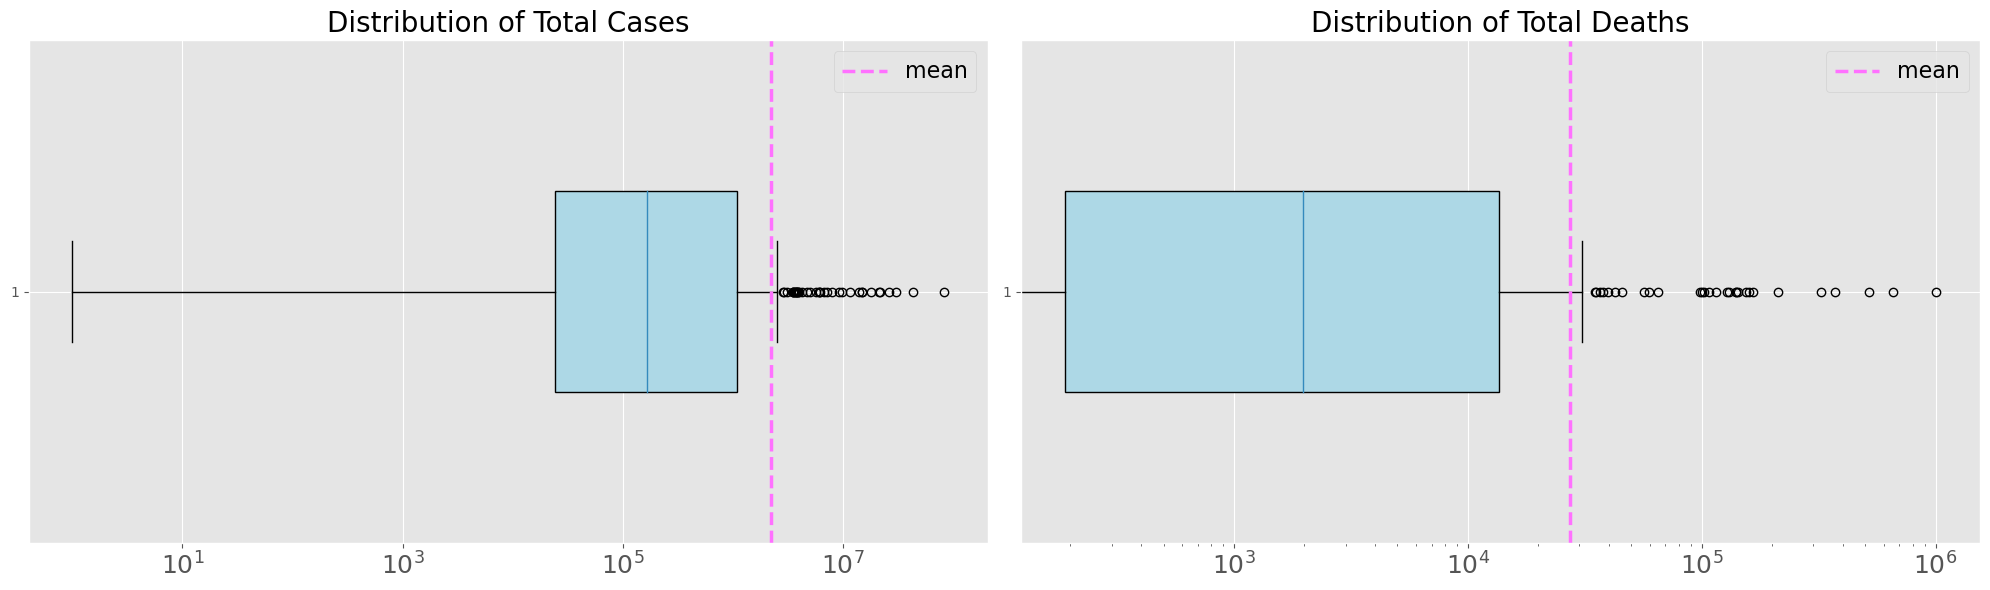

In [132]:
# plt.rcParams["figure.figsize"] = (8, 6) 
columns=['Total Cases' , 'Total Deaths']
n=1
for i in columns:
    plt.subplot(1,2 , n)
    ax = plt.gca()    
    plt.boxplot(df[i],vert=False, widths=0.4, patch_artist=True, boxprops={'facecolor':'lightblue'})
    plt.xscale('log')
    plt.axvline(x=df[i].mean(),ls='--',lw=2.5, color='#ff71ff',label='mean')
    ax.set_title(f'Distribution of {i}' , fontsize=20)
    n+=1 
    ax.tick_params(axis='x', labelsize=18)
    plt.tight_layout()
    plt.legend(fontsize=16)
# plt.savefig(r"D:\mohamed\chart10.png")

In [134]:
df[df['Total Deaths']==0]

,Country,ISO3,Population,Continent,Total Cases,Total Deaths,Tot Cases//1M pop,Tot Deaths/1M pop,Death percentage
46,Cook islands,COK,17592,Oceania,2118,0,120396,0,0.0
67,Falkland islands,FLK,3657,Latin america,123,0,33634,0,0.0
118,Macao,MAC,664828,Asia,82,0,123,0,0.0
125,Marshall islands,MHL,59889,Oceania,7,0,117,0,0.0
131,Micronesia,FSM,117134,Oceania,1,0,9,0,0.0
148,Niue,NIU,1645,Oceania,7,0,4255,0,0.0
168,Saint helena,SHN,6109,Africa,2,0,327,0,0.0
217,Vatican city,VAT,805,Europe,29,0,36025,0,0.0


In [135]:
df[['Total Cases' , 'Total Deaths']].mean()

Total Cases     2.184781e+06
Total Deaths    2.744813e+04
dtype: float64

## the result of analysis


* the correlation between increase total cases and population is (+)
* the correlation between increase total deaths and population is (+)
* the correlation between increase total deaths and increase total cases is (+)

* highest Continent in total cases and total deaths is (Europe) , has 36.7% of total cases and 28.8% of total deaths
* lowest Continent in total cases and total deaths is (Oceania) , has 1.1% of total cases and 0.2% of total deaths
* the highest continent in population is (Asia) , it is second in total cases and third in total deaths

* in general the virus is not dangrous , the percentage of deaths in total = 1.2 % 
* many country have 0:5% of population is has infiction , but the mean of all countries is about 20% of population is about 2 *10^6
* many country have 0:1.5% of cases is dead, but the mean of all countries is about 1.25% of cases is about 2.5 *10^4

* the highest country in total cases is (USA) and the lowset is (micronesia)
* the highest country in total deaths is (USA) and the lowset is (Cook islands , Falkland islands , Macao , Marshall    islands , Micronesia , Niue , Saint helena , Vatican city)